# 1)- Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# for preprocessing
import pandas as pd
import numpy as np
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# 2)-Loading dataset

In [4]:
dataset=pd.read_csv('demonetization-tweets.csv', encoding='ISO-8859-1')

In [5]:
X=dataset.text

# 3)- Estimator for popularity of tweets
**As we are looking for popularity of tweets, we may measure it by checking if tweet has been retweeted again. Unfortunately, we do not have how many times retweets occured.Still, we have a good way of seeing importance of tweets.**

In [6]:
y=dataset.isRetweet

In [7]:
y.shape

(14940,)

In [8]:
type(y)

pandas.core.series.Series

### 3.1)- Cleaning text

In [9]:
corpus = [] # defining corpus
for i in range(0, len(dataset['text'])): # giving range of values from 0 to 1000
    tweet = re.sub('[^a-zA-Z]', ' ', dataset['text'][i]) # using i for all values instead of 1 column
    tweet = tweet.lower()
    tweet = tweet.split()
    ps = PorterStemmer()
    stopword_set = set(stopwords.words('english'))
    tweet = [ps.stem(word) for word in tweet if not word in stopword_set]
    tweet = ' '.join(tweet)
    corpus.append(tweet) # finally attach all these cleaned values to corpus directory 

### 3.2)- Creating Corpus

In [10]:
corpus_series = pd.Series(corpus)

X=corpus_series

In [11]:
type(X)

pandas.core.series.Series

## 3.3)- Splitting test-train data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# 4)- Vectorize

1. Import (from sklearn.feature_extraction.text import CountVectorizer)

2. instantiate CountVectorizer (vect = CountVectorizer()

**That's where you can tune vector like model. Follow Data science for some techniques**

3. Fit (Learn vocabulary)

4. Transform (transform training data into a 'document-term matrix')

5. convert sparse matrix to a dense matrix (train_dtm.toarray())

### a- Count Vectorize

In [13]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

### b-TF IDF

In [14]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# 5)-Finding most accurate model

We will compare the following models (and training data):<br>

- multinomialNB with counts (sgd_count_clf)<br>
- multinomialNB with tf-idf (mn_tfidf_clf)<br>
- passive aggressive with tf-idf (pa_tfidf_clf)<br>
- linear svc with tf-idf (svc_tfidf_clf)<br>
- linear sgd with tf-idf (sgd_tfidf_clf)<br>

### i- MultinomialNB with count Vector

In [15]:
mn_count_clf = MultinomialNB(alpha=0.1)

mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.894


### confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
Key matrix elements are:<br>
true positives (TP): These are cases in which we predicted yes (they have the purchased), and they do have the purchases.<br>
true negatives (TN): We predicted no, and they don't have purchased.<br>
false positives (FP): We predicted yes, but they have actually not the purchased. (Also known as a "Type I error.")<br>
false negatives (FN): We predicted no, but they actually ourchased. (Also known as a "Type II error.")<br>

In [16]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[ 598,  172],
       [ 146, 2072]], dtype=int64)

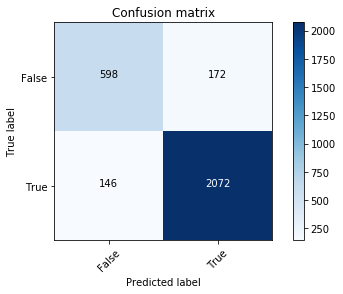

In [18]:
plot_confusion_matrix(cm, classes=['False', 'True'])

### ii. MultinomialNB with tf-idf (mn_tfidf_clf)

In [19]:
mn_tfidf_clf = MultinomialNB(alpha=0.1)

mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.851


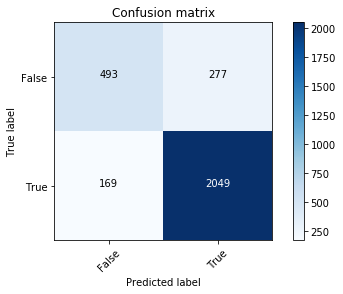

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['False', 'True'])

### iii.Passive aggressive with tf-idf (pa_tfidf_clf)

In [21]:
pa_tfidf_clf = PassiveAggressiveClassifier(n_iter=50)

pa_tfidf_clf.fit(tfidf_train, y_train)
pred = pa_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.909


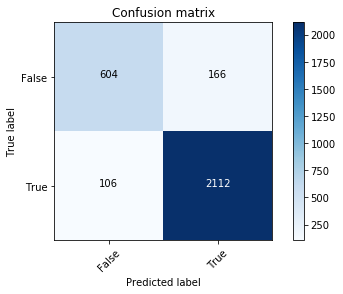

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['False', 'True'])

### iv.Linear svc with tf-idf (svc_tfidf_clf)

In [23]:
svc_tfidf_clf = LinearSVC()

svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.902


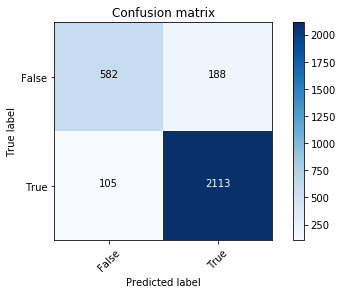

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['False', 'True'])

### v.Linear sgd with tf-idf (sgd_tfidf_clf)

In [25]:
sgd_tfidf_clf = SGDClassifier()

sgd_tfidf_clf.fit(tfidf_train, y_train)
pred = sgd_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.890


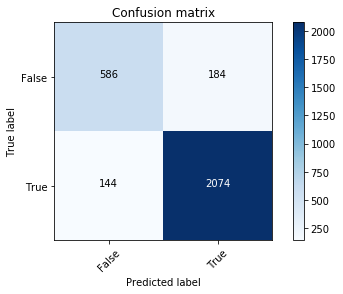

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['False', 'True'])

# 6)- Sentiment Analysis of tweets

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

### 6.a)- checking most common words used

In [28]:
from wordcloud import WordCloud, STOPWORDS

In [29]:
stopwords=set(STOPWORDS)

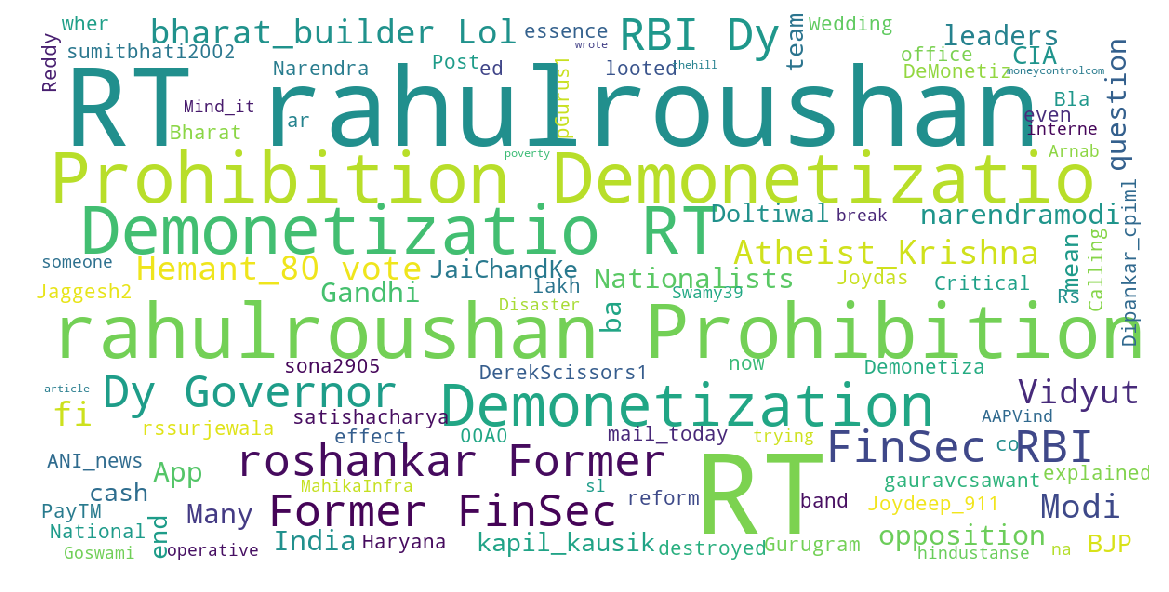

In [30]:
def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

Mywordcloud(dataset["text"].dropna())

**Using vader lexicon for sentiment analysis**

In [31]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sid= SentimentIntensityAnalyzer()

In [32]:
dataset['Sent_compound_Polarity'] = dataset.text.apply(lambda x:sid.polarity_scores(x)['compound'])
dataset['Sent_neutral']= dataset.text.apply(lambda x:sid.polarity_scores(x)['neu'])
dataset['Sent_Neg']= dataset.text.apply (lambda x:sid.polarity_scores(x)['neg'])
dataset['Sent_pos']= dataset.text.apply(lambda x:sid.polarity_scores(x)['pos'])
dataset['Sent_type']=''

In [33]:
dataset.loc[dataset.Sent_compound_Polarity > 0, 'Sent_type']= 'Positive'

dataset.loc[dataset.Sent_compound_Polarity == 0, 'Sent_type']= 'Neutral'

dataset.loc[dataset.Sent_compound_Polarity < 0, 'Sent_type']= 'Negative'

In [34]:
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,statusSource,screenName,retweetCount,isRetweet,retweeted,Sent_compound_Polarity,Sent_neutral,Sent_Neg,Sent_pos,Sent_type
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.783,0.1,0.117,Positive
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.0,0.000,Neutral
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.0,0.000,Neutral
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.0,0.000,Neutral
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,...,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.0,0.000,Neutral


In [35]:
tweets_sentiment=dataset.Sent_type.value_counts()
tweets_sentiment

Positive    6577
Neutral     4403
Negative    3960
Name: Sent_type, dtype: int64

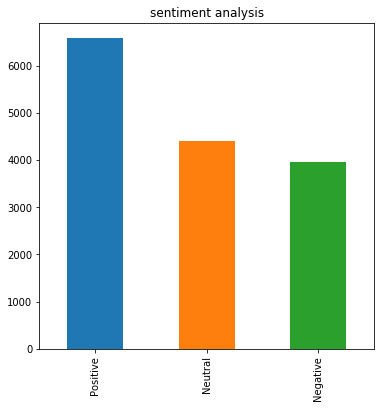

In [36]:
dataset.Sent_type.value_counts().plot (kind='bar' , title="sentiment analysis")

In [37]:
feature=[ "Sent_type" , "isRetweet"]

In [38]:
feature

['Sent_type', 'isRetweet']

In [39]:
Tweet_reason=dataset[feature]

In [40]:
Tweet_reason.head()

,Sent_type,isRetweet
0,Positive,True
1,Neutral,True
2,Neutral,True
3,Neutral,True
4,Neutral,True


**We can check how many tweets with positive polarity have been retweeted and get popular. However, this is not part of this study** 

# 7)- Sentiments over time
We will study here sentiment analysis over time. In addition, we will find how tweets and re-tweets are related.

In [41]:
from pandas import Timestamp
from ggplot import*

In [42]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

In [43]:
dataset['hour'] = pd.DatetimeIndex(dataset['created']).hour
dataset['date'] = pd.DatetimeIndex(dataset['created']).date
dataset['minute']=pd.DatetimeIndex(dataset['created']).minute

In [44]:
df_tweet=(dataset.groupby('hour', as_index=False).Sent_compound_Polarity.mean())

In [45]:
df_tweet.head()

,hour,Sent_compound_Polarity
0,0,0.018241
1,1,0.050631
2,2,0.087354
3,3,0.047104
4,4,0.247119


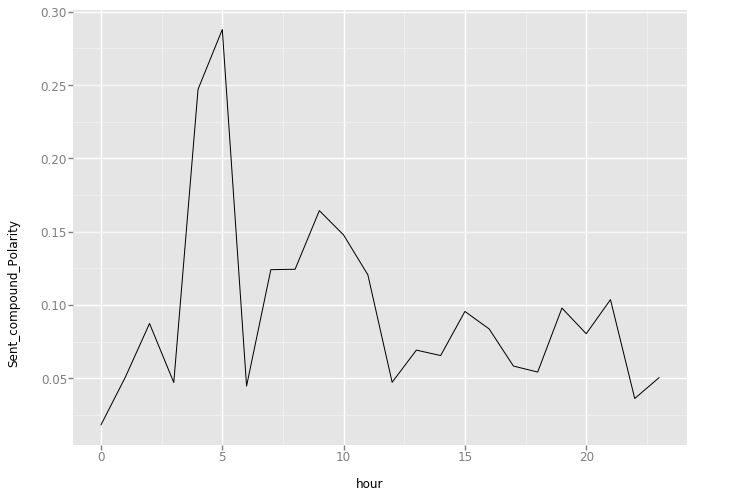

<ggplot: (165528367224)>

In [46]:
ggplot(aes(x='hour', y='Sent_compound_Polarity'),data=df_tweet)+geom_line()

In [47]:
dataset['retweetCount'].describe()

count    14940.000000
mean       223.770147
std        411.793864
min          0.000000
25%          1.000000
50%         40.000000
75%        197.000000
max       5170.000000
Name: retweetCount, dtype: float64

In [48]:
#Creating retweet count for checking relation with hour and date
dataset['hour'] = pd.DatetimeIndex(dataset['created']).hour
dataset['date'] = pd.DatetimeIndex(dataset['created']).date
dataset['count']=1
datset_filtered=dataset[['hour','date','count', 'retweetCount']]
datset_filtered.head()

,hour,date,count,retweetCount
0,18,2016-11-23,1,331
1,18,2016-11-23,1,66
2,18,2016-11-23,1,12
3,18,2016-11-23,1,338
4,18,2016-11-23,1,120


### Tweets per hour

In [49]:
dataset_hourly=datset_filtered.groupby(["hour"]).sum().reset_index()
dataset_hourly.head(10)

,hour,count,retweetCount
0,0,222,31868
1,1,307,65764
2,2,342,53562
3,3,513,67820
4,4,602,247478
5,5,618,242547
6,6,1037,376454
7,7,795,255041
8,8,759,204869
9,9,761,163646


### Tweets vs Re-tweets

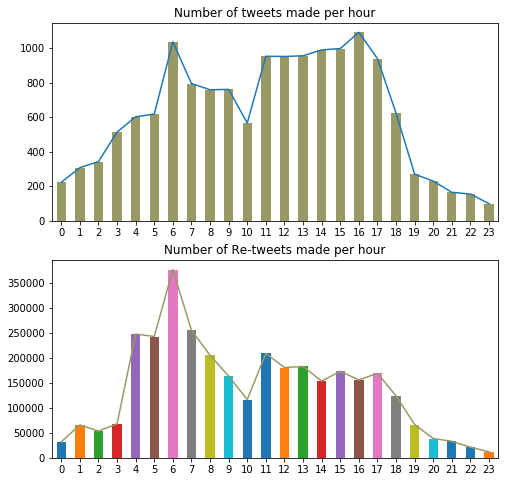

In [50]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(8,8))

ax1.title.set_text("Number of tweets made per hour")
dataset_hourly["count"].plot.bar(ax=ax1 ,color='#999966')
dataset_hourly["count"].plot(ax=ax1)


ax2.title.set_text("Number of Re-tweets made per hour")
dataset_hourly["retweetCount"].plot.bar(ax=ax2)
dataset_hourly["retweetCount"].plot(ax=ax2, color='#999966')

In [51]:
pivot_df= datset_filtered.pivot_table(datset_filtered, index=["date", "hour"], aggfunc= np.sum)
print(pivot_df)  
dates=pivot_df.index.get_level_values(0).unique()

                 count  retweetCount
date       hour                     
2016-11-22 10       21          6058
           11      318         82888
           12      387         63582
           13      382         70898
           14      349         64110
           15      314         56379
           16      277         38631
           17      260         44812
           18      202         49493
           19       96         24644
           20       70         17301
           21       45          7385
           22       40          5954
           23       25          6991
2016-11-23 0        76         10070
           1        93         21082
           2       107         18859
           3       175         22033
           4       195         21233
           5       221         20021
           6       595        176130
           7       427         84026
           8       425         60479
           9       482         75095
           10      277         39148
 

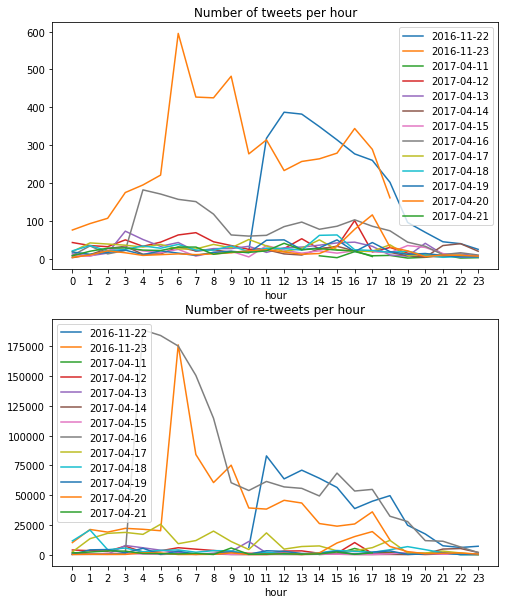

In [52]:
f,ax= plt.subplots(2,1,figsize=(8,10))
plt.setp (ax, xticks=list(range(0,24)))

ax[0].title.set_text("Number of tweets per hour")
ax[1].title.set_text("Number of re-tweets per hour")

for date in dates:
    split= pivot_df.xs(date)
    
    split["count"].plot(ax=ax[0], legend=True, label='' + str (date))
    split["retweetCount"].plot(ax=ax[1], legend=True, label='' + str(date))

### Trends for tweets and re-tweets over minute unit

In [53]:
dataset_minutes=dataset.groupby(['minute'])['retweetCount'].sum()

Text(0.5,1,'The number of retweet by minute')

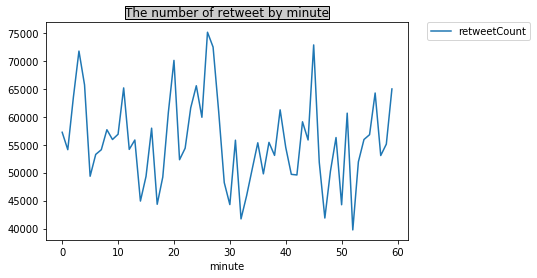

In [54]:
dataset_minutes. transpose().plot(kind='line', figsize=(6.5,4))
plt.legend(bbox_to_anchor=(1.05,1), loc=2 , borderaxespad=0)
plt.title('The number of retweet by minute', bbox={'facecolor':'0.8', 'pad':0})

In [55]:
dataset['count']=1
datset_filtered = dataset[['hour', 'Sent_type', 'count']]
pivot_tweets= datset_filtered.pivot_table(datset_filtered, index=["Sent_type", "hour"], aggfunc=np.sum)
print(pivot_tweets.head(10))

                count
Sent_type hour       
Negative  0        57
          1        71
          2        93
          3       162
          4       151
          5       123
          6       394
          7       241
          8       224
          9       166


## Evalution of Tweeter Sentiments

Text(0.5,1,'Evolution of sentiment by hours')

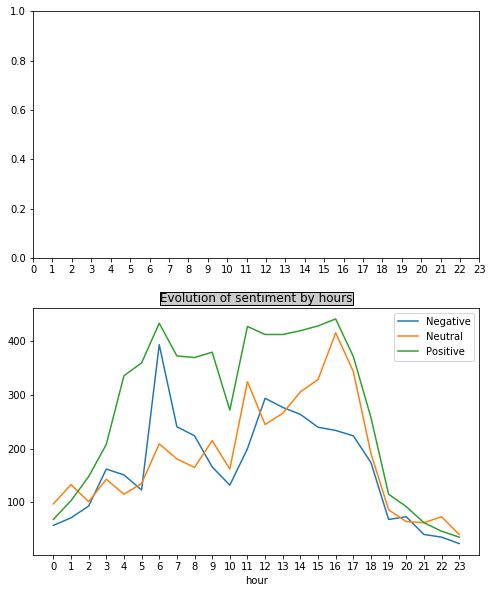

In [56]:
Sent_type=pivot_tweets.index.get_level_values(0).unique()
f,ax=plt.subplots (2,1,figsize=(8,10))
plt.setp(ax, xticks=list(range(0,24)))
for Sentiment_type in Sent_type:
    split=pivot_tweets.xs(Sentiment_type)
    split["count"].plot(legend=True, label='' + str (Sentiment_type))
plt.title('Evolution of sentiment by hours', bbox={'facecolor': '0.8','pad' : 0})